## 5. Predict
### 5.1 Loading libraries & dataset

In [3]:
library("FSinR")
library("data.table")
library("magrittr")
library("ggplot2")

Let us first apply all pre-processing steps for X_test

In [4]:
X_test=fread("https://u2bigdataprojectpredictfrombraina-donotdelete-pr-keui4jukxng1lb.s3.eu.cloud-object-storage.appdomain.cloud/X_test.csv")
X_test$Id = X_test$Id - 1
str(X_test[,1:10])
X_test$Id<- as.factor(X_test$Id)
X_test$Channels<- as.factor(X_test$Channels)
X_test$Segments<- as.factor(X_test$Segments)

Classes ‘data.table’ and 'data.frame':	264880 obs. of  10 variables:
 $ Id      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Channels: int  1 1 1 1 1 1 1 1 1 1 ...
 $ Segments: int  1 2 3 4 5 6 7 8 9 10 ...
 $ V1      : num  -9.21 -1.86 -65.86 7.17 -23.96 ...
 $ V2      : num  -8.13 -4.7 -65.21 4.57 -25.74 ...
 $ V3      : num  -7.3 -6.7 -64.43 2.56 -27.32 ...
 $ V4      : num  -7.23 -7.52 -64.03 1.4 -29.17 ...
 $ V5      : num  -7.969 -6.827 -63.645 0.468 -31.145 ...
 $ V6      : num  -8.92 -4.57 -62.5 -1.16 -33.16 ...
 $ V7      : num  -9.34 -1.1 -60.51 -3.45 -35.17 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [5]:
Obs = colnames(X_test[,-c(1:3)])
test_a<-copy(X_test)
test_fourier=X_test[, (Obs) := lapply(.SD, fft), .SDcols=Obs]
test_module <-test_fourier[, (Obs) := lapply(.SD, Mod), .SDcols=Obs]
test_module_scaled=test_module[, (Obs) := lapply(.SD, scale), .SDcols=Obs]

In [6]:
test_select=test_module_scaled[,c(2,3,7,8,9,10,382,383,501,502)]

### 5.2 Predict

Our model prediction from training dataset of 4.0 Part was : 

In [226]:
prediction

<PredictionClassif> for 52976 observations:
    row_id truth response    prob.0    prob.1
         1     0        1 0.4006485 0.5993515
         4     0        1 0.3296089 0.6703911
        19     0        0 0.5253722 0.4746278
---                                          
    264871     0        1 0.3680431 0.6319569
    264873     0        1 0.4816040 0.5183960
    264880     0        0 1.0000000 0.0000000

Let us apply our prediction with newdata, i.e test_select dataset.

In [231]:
pred_test=at$predict_newdata(test_select)

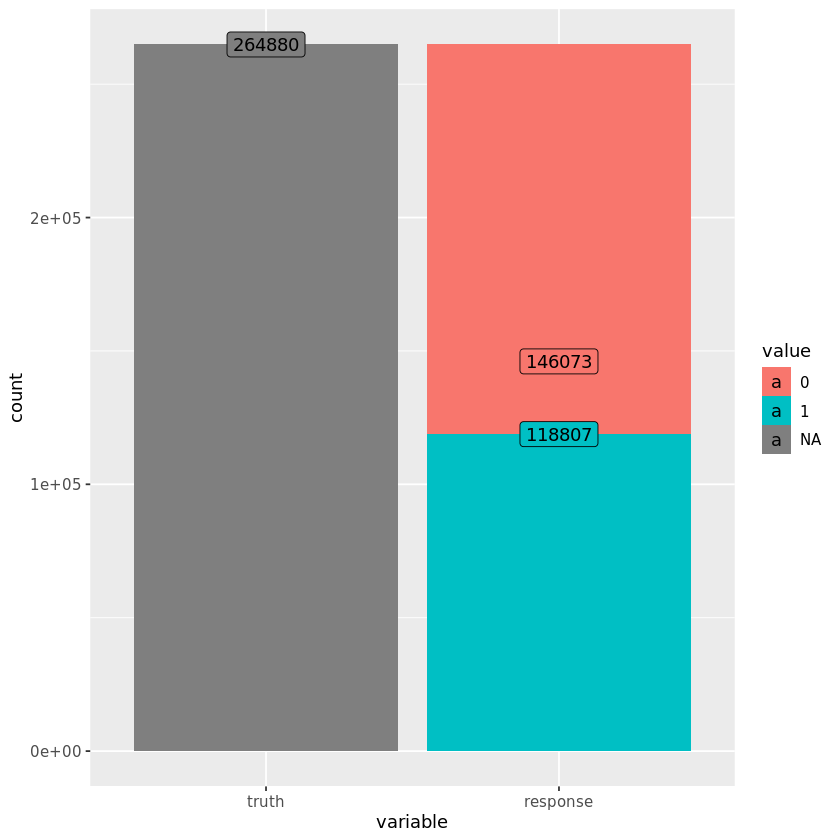

In [246]:
autoplot(pred_test$reponse)

We transform our results into a data.table (R6 format from mlr3 package to data.table)

In [252]:
pred=as.data.table(pred_test)

In [254]:
pred[,3]

row_id,truth,response,prob.0,prob.1
<int>,<fct>,<fct>,<dbl>,<dbl>
1,NA,0,0.5296784,0.4703216
2,NA,0,0.5296784,0.4703216
3,NA,1,0.4700531,0.5299469
4,NA,1,0.4424718,0.5575282
5,NA,1,0.4700531,0.5299469
6,NA,0,0.5296784,0.4703216
7,NA,1,0.4039079,0.5960921
8,NA,0,0.5296784,0.4703216
9,NA,1,0.4039079,0.5960921


We select the column we are interrested in. 

In [260]:
final_predict=cbind(pred[,c(3,4,5)], test_module_scaled[,1])

In [261]:
head(final_predict)

response,prob.0,prob.1,Id
<fct>,<dbl>,<dbl>,<fct>
0,0.5296784,0.4703216,0
0,0.5296784,0.4703216,0
1,0.4700531,0.5299469,0
1,0.4424718,0.5575282,0
1,0.4700531,0.5299469,0
0,0.5296784,0.4703216,0


In order to get the accuracy from the challenge provider, we have to have a final Y_test csv file with only id and the sex predicted.
In order to get that, we group each id with its computed probability for one class (we choose class 0, men). Therefore, we will be able to determine the predicted sex by taking 0.5 threshold : if the mean of prob0>0.5 then our id is predicted as a man, woman otherwise.

Mean per id of prop

In [263]:
final_pred_mean=final_predict[,list(Mean=mean(prob.0)),by=Id]

In [266]:
final_pred_mean$gender=ifelse(final_pred_mean$Mean>0.5,0,1)

Select only columns for submission

In [268]:
final_pred_mean=final_pred_mean[,c(1,3)]

In [269]:
head(final_pred_mean)

Id,gender
<fct>,<dbl>
0,0
1,1
2,0
3,0
4,1
5,1
6,1
7,1
8,0


In [274]:
final_pred_mean[,.N,by=gender]

gender,N
<dbl>,<int>
0,818
1,128


In [270]:
getwd()

[1] "/mnt/batch/tasks/shared/LS_root/mounts/clusters/memoire/code/Users/a.settelen"

Export to csv

In [271]:
fwrite(final_pred_mean,"/mnt/batch/tasks/shared/LS_root/mounts/clusters/memoire/code/Users/a.settelen/Y_test.csv")

[Resutls from data challenge provider](https://drive.google.com/file/d/1xJSdfClttPQS3GFheoHWqfwqo9Wi5DMK/view?usp=sharing)

Our final results is not too bad (0.716 accuracy on public score). 
That means that for the 946 ids, we have well predicted the sex for 71% based on their EEG sleep activity. 
This results impressed us in term of the information we can get for an individual based on their sleep activity. 
Machine Learning techniques do have a lot to explore in the futur in order to better understand our brain and maybe to help brain science in curing.

Some ideas to better our score : 
- Apply Welch method on pre-processing step
- Change the metrics on the keras model in particular for the sdg optimize
- Try XGboost Forest and Convolutional Neural network
- Set a tunning parameters for K-best (set k in different levesl)